In [1]:
from matplotlib import pyplot as plt
from numpy import unique, where
from sklearn.preprocessing import StandardScaler
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

MIN_SAMPLES = 5

In [2]:
datasets = {
    "Spherical Clusters": pd.read_csv('./Datasets/Speherical_Clusters.csv'),
    "Moon Clusters": pd.read_csv('./Datasets/moons_Clusters.csv'),
    "Overlapping Clusters": pd.read_csv('./Datasets/Overlapping_Clusters.csv'),
    "Hierarchical Structure": pd.read_csv('./Datasets/zoo.csv')
}

In [3]:
def plotDBSCAN(data, eps, title):    
    # Perform DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=MIN_SAMPLES)
    labels = dbscan.fit_predict(data)

    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    n_noise = list(labels).count(-1)

    print("Number of clusters: " + str(n_clusters))
    print("Number of outliers: " + str(n_noise))

    plt.figure(figsize=(8, 6))

    colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']  

    plt.scatter(data[labels == -1][:, 0], data[labels == -1][:, 1], c='black', label='Noise', s=30)

    for label in unique_labels:
        if label != -1:
            plt.scatter(data[labels == label][:, 0], data[labels == label][:, 1],
                        c=colors[label % len(colors)], label=f'Cluster {label}', s=30)

    plt.title(title)
    plt.legend(loc='best')
    plt.show()

In [4]:
# find the best eps value to use based on the elbow method
def get_eps(data, min_samples):
    nbrs = NearestNeighbors(n_neighbors=min_samples).fit(data)
    distances, _ = nbrs.kneighbors(data)
    k_distances = np.sort(distances[:, -1], axis=0)
    
    kneedle = KneeLocator(range(len(k_distances)), k_distances, curve='convex', direction='increasing')
    elbow_index = kneedle.elbow
    
    return k_distances[elbow_index]

Number of clusters: 4
Number of outliers: 10


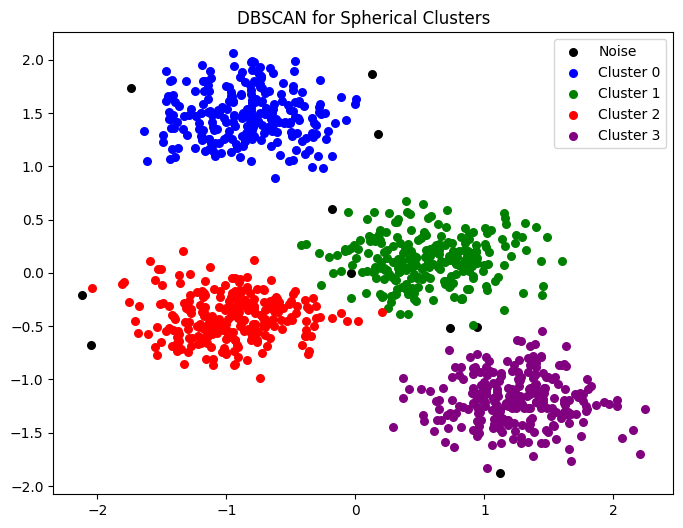

eps value used: 0.25642121625820175


In [5]:
scaler = StandardScaler()
data = datasets["Spherical Clusters"] 
data = scaler.fit_transform(data)
plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Spherical Clusters")
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

Number of clusters: 2
Number of outliers: 4


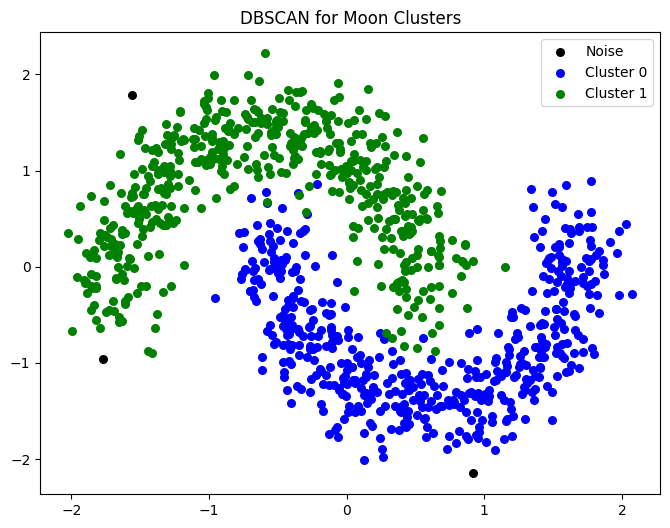

eps value used: 0.2907502372644264


In [6]:
scaler = StandardScaler()
data = datasets["Moon Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Moon Clusters")
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

Number of clusters: 3
Number of outliers: 12


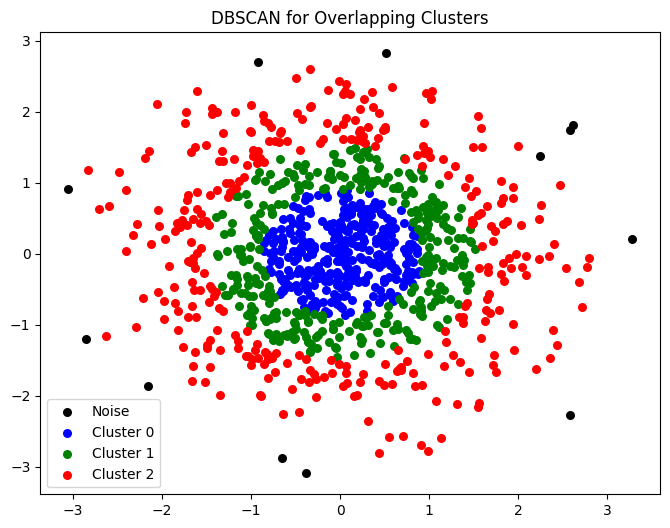

eps value used: 0.47291029493507


In [7]:
scaler = StandardScaler()
data = datasets["Overlapping Clusters"] 
data = scaler.fit_transform(data)

plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Overlapping Clusters")
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))

Number of clusters: 3
Number of outliers: 3


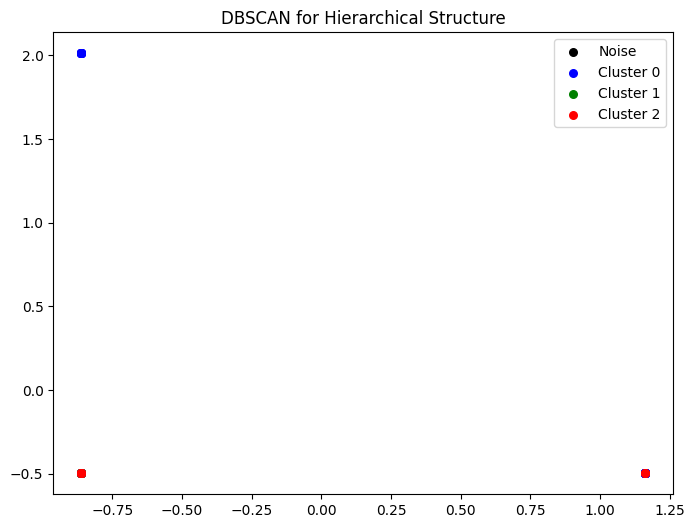

eps value used: 3.9441099443624696


In [8]:
scaler = StandardScaler()
data = datasets["Hierarchical Structure"].drop(columns=['animal_name'])
data = scaler.fit_transform(data)

plotDBSCAN(data, get_eps(data, MIN_SAMPLES), "DBSCAN for Hierarchical Structure")
print("eps value used: " + str(get_eps(data, MIN_SAMPLES)))